# R for Data Science

Make sure to select `R` kernel in JupyterLab in order to run this notebook (`Kernel` -> `Change Kernel ...` -> `R`).

If you cannot find the `R` kernel in your JupyterLab, see this following link to install it. 

https://richpauloo.github.io/2018-05-16-Installing-the-R-kernel-in-Jupyter-Lab/

For reproducibility, we display the system information. 

In [1]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.3     utf8_1.2.2      digest_0.6.29   crayon_1.5.1   
 [5] IRdisplay_1.1   repr_1.1.4      lifecycle_1.0.1 jsonlite_1.8.0 
 [9] evaluate_0.15   pillar_1.7.0    rlang_1.0.4     cli_3.3.0      
[13] uuid_1.1-0      vctrs_0.4.1     ellipsis_0.3.2  IRkernel_1.3   
[17] tools_4.2.1     glue_1.6.2      fastmap_1.1.0   compiler_4.2.1 
[21] base64enc_0.1-3 pbdZMQ_0.3-7    htmltools_0.5.2

## Typical workflow for a data science project

<p align="center">
<img src="./data-science.png" height="300">
</p>

Source: [R for Data Science](https://r4ds.had.co.nz/).

## tidyverse

- [tidyverse](https://www.tidyverse.org/) is a collection of R packages for data ingestion, wrangling, and visualization.

<p align="center">
<img src="./tidyverse_pkgs.jpeg" width="450">
</p>

<p align="center">
<img src="./tidyverse_categories.png" width="450">
</p>

- The lead developer Hadley Wickham won the 2019 _COPSS Presidents’ Award_ (the Nobel Prize of Statistics) 

> for influential work in statistical computing, visualization, graphics, and data analysis; for developing and implementing an impressively comprehensive computational infrastructure for data analysis through R software; for making statistical thinking and computing accessible to large audience; and for enhancing an appreciation for the important role of statistics among data scientists.

- Install the tidyverse ecosystem by `install.packages("tidyverse")`. You don't need to install on the server since it's already installed there.

In [2]:
# load the tidyverse ecosystem
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Inspect MIMIC data files

In [3]:
# getwd() to check the current working directory, setwd() to change it
# path to the MIMIC data
if (Sys.info()["nodename"] == "RELMDOMFAC30610") {
    # DOMStat laptop
    mimic_path <-  "/Users/huazhou/Desktop/mimic-iv-1.0"
} else if (Sys.info()["user"] == "jovyan") {
    # workshop server
    mimic_path <- "/home/shared/1.0"
}
mimic_path

[1] "/Users/huazhou/Desktop/mimic-iv-1.0"

### MIMIC directory structure

We run the Bash command `tree -s -L 2 /Users/huazhou/Documents/Box Sync/MIMIC/mimic-iv-1.0` to display the MIMIC directory structure. The number in front of each data file indicates its file size (in bytes). 

In [4]:
# tree -s -L 2 /Users/huazhou/Documents/Box\ Sync/MIMIC/mimic-iv-1.0
# only work on system (Linux or MacOS) with `tree` command installed
cat(system(str_c("tree -s -L 2 ", shQuote(mimic_path)), intern = TRUE), sep = '\n')

[        288]  /Users/huazhou/Desktop/mimic-iv-1.0
├── [       2518]  LICENSE.txt
├── [       2459]  SHA256SUMS.txt
├── [        192]  core
│   ├── [   17208966]  admissions.csv.gz
│   ├── [        606]  index.html
│   ├── [    2955582]  patients.csv.gz
│   └── [   53014503]  transfers.csv.gz
├── [        672]  hosp
│   ├── [     430049]  d_hcpcs.csv.gz
│   ├── [     863239]  d_icd_diagnoses.csv.gz
│   ├── [     579998]  d_icd_procedures.csv.gz
│   ├── [      14898]  d_labitems.csv.gz
│   ├── [   29531152]  diagnoses_icd.csv.gz
│   ├── [   11684062]  drgcodes.csv.gz
│   ├── [  515763427]  emar.csv.gz
│   ├── [  476252563]  emar_detail.csv.gz
│   ├── [    2098831]  hcpcsevents.csv.gz
│   ├── [       2325]  index.html
│   ├── [ 2091865786]  labevents.csv.gz
│   ├── [  171624288]  labevents_filtered_itemid.csv.gz
│   ├── [   99133381]  microbiologyevents.csv.gz
│   ├── [  422874088]  pharmacy.csv.gz
│   ├── [  501381155]  poe.csv.gz
│   ├── [   24020923]  poe_detail.csv.gz
│   ├── [  3670

Data files (`csv.gz`) are grouped under three directories; `core`, `hosp`, and `icu`.

Most relevant to this tutorial are `icustays.csv.gz`, `admissions.csv.gz`, `patients.csv.gz`, and `chartevents.csv.gz`. Let's first peek into the content of each file, by calling Bash commands within R. Before that, we introduce the pipe, which is heavily used in this tutorial.

### Pipe

Pipe linearizes nested function calls and makes complex code more readable. It enables cleaner code by.    
1. structuring sequences of data operations left-to-right (as opposed to from the inside and out),  
2. avoiding nested function calls,  
3. minimizing the need for local variables and function definitions, and   
4. making it easy to add steps anywhere in the sequence of operations.  

Pipe exists in many languages: Linux (`|`, `>`, `<`, `>>`), R (`%>%` implemented in the magrittr package in tidyverse), and Julia (`|>`).

For example, the following nested code calls three R functions in sequence: (i) `str_c` function to construct proper Bash command (a string) to run, (ii) `system` function to run the Bash command, and (iii) `cat` function to properly break lines in the Bash command output.
```r
cat(system(str_c("zcat < ", shQuote(str_c(mimic_path, "/icu/icustays.csv.gz")), " | head"), intern = TRUE), sep = `\n`)
```
Using pipe `%>%`, the following code achieves the same purpose 
```r
str_c("zcat < ", shQuote(str_c(mimic_path, "/icu/icustays.csv.gz")), " | head") %>%
    system(intern = TRUE) %>%
    cat(sep = '\n')
```

### icustays.csv.gz

Each row is an ICU stay. One patient can have multiple ICU stays during one hospital admission.

In [5]:
str_c("zcat < ", shQuote(str_c(mimic_path, "/icu/icustays.csv.gz")), " | head") %>%
    system(intern = TRUE) %>%
    cat(sep = '\n')

subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
17867402,24528534,31793211,Trauma SICU (TSICU),Trauma SICU (TSICU),2154-03-03 04:11:00,2154-03-04 18:16:56,1.5874537037037035
14435996,28960964,31983544,Trauma SICU (TSICU),Trauma SICU (TSICU),2150-06-19 17:57:00,2150-06-22 18:33:54,3.025625
17609946,27385897,33183475,Trauma SICU (TSICU),Trauma SICU (TSICU),2138-02-05 18:54:00,2138-02-15 12:42:05,9.741724537037038
18966770,23483021,34131444,Trauma SICU (TSICU),Trauma SICU (TSICU),2123-10-25 10:35:00,2123-10-25 18:59:47,0.35054398148148147
12776735,20817525,34547665,Neuro Stepdown,Neuro Stepdown,2200-07-12 00:33:00,2200-07-13 16:44:40,1.6747685185185184
10215159,24283593,34569476,Trauma SICU (TSICU),Trauma SICU (TSICU),2124-09-20 15:05:29,2124-09-21 22:06:58,1.2926967592592593
14489052,26516390,35056286,Trauma SICU (TSICU),Trauma SICU (TSICU),2118-10-26 10:33:56,2118-10-26 20:28:10,0.4126620370370371
15914763,28906020,36909804,Trauma SICU (TSICU),Trauma SICU (TSI

### admissions.csv.gz

Each row is a hospital admission. One patient can be admitted multiple times.

In [6]:
str_c("zcat < ", shQuote(str_c(mimic_path, "/core/admissions.csv.gz")), " | head") %>%
    system(intern = TRUE) %>%
    cat(sep = '\n')

subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
14679932,21038362,2139-09-26 14:16:00,2139-09-28 11:30:00,,ELECTIVE,,HOME,Other,ENGLISH,SINGLE,UNKNOWN,,,0
15585972,24941086,2123-10-07 23:56:00,2123-10-12 11:22:00,,ELECTIVE,,HOME,Other,ENGLISH,,WHITE,,,0
11989120,21965160,2147-01-14 09:00:00,2147-01-17 14:25:00,,ELECTIVE,,HOME,Other,ENGLISH,,UNKNOWN,,,0
17817079,24709883,2165-12-27 17:33:00,2165-12-31 21:18:00,,ELECTIVE,,HOME,Other,ENGLISH,,OTHER,,,0
15078341,23272159,2122-08-28 08:48:00,2122-08-30 12:32:00,,ELECTIVE,,HOME,Other,ENGLISH,,BLACK/AFRICAN AMERICAN,,,0
19124609,20517215,2169-03-14 12:44:00,2169-03-20 19:15:00,,ELECTIVE,,HOME,Other,ENGLISH,,UNKNOWN,,,0
17301855,29732723,2140-06-06 14:23:00,2140-06-08 14:25:00,,ELECTIVE,,HOME,Other,ENGLISH,,WHITE,,,0
17991012,24298836,2181-07-10 20:28:00,2181-07-12 15:49:00,,ELECTIVE,,HOME,Other,ENGLISH,,WH

### patients.csv.gz

Each row is a unique patient.

In [7]:
str_c("zcat < ", shQuote(str_c(mimic_path, "/core/patients.csv.gz")), " | head") %>%
    system(intern = TRUE) %>%
    cat(sep = '\n')

subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
10000048,F,23,2126,2008 - 2010,
10002723,F,0,2128,2017 - 2019,
10003939,M,0,2184,2008 - 2010,
10004222,M,0,2161,2014 - 2016,
10005325,F,0,2154,2011 - 2013,
10007338,F,0,2153,2017 - 2019,
10008101,M,0,2142,2008 - 2010,
10009872,F,0,2168,2014 - 2016,
10011333,F,0,2132,2014 - 2016,


### chartevents.csv.gz

Each row is a specific vital reading during an ICU stay.

In [8]:
str_c("zcat < ", shQuote(str_c(mimic_path, "/icu/chartevents_filtered_itemid.csv.gz")), " | head") %>%
    system(intern = TRUE) %>%
    cat(sep = '\n')

subject_id,hadm_id,stay_id,charttime,itemid,valuenum
10003700,28623837,30600691,2165-04-24 05:30:00,220045,65
10003700,28623837,30600691,2165-04-24 05:38:00,223761,97.6
10003700,28623837,30600691,2165-04-24 06:00:00,220045,56
10003700,28623837,30600691,2165-04-24 06:09:00,220045,55
10003700,28623837,30600691,2165-04-24 07:00:00,220045,57
10003700,28623837,30600691,2165-04-24 07:00:00,223761,97.8
10003700,28623837,30600691,2165-04-24 08:00:00,220045,56
10004235,24181354,34100191,2196-02-24 16:39:00,220045,136
10004235,24181354,34100191,2196-02-24 17:00:00,220045,134


Dictionary for `itemid` is provided by the `d_items.csv.gz` file.

In [9]:
str_c("zcat < ", shQuote(str_c(mimic_path, "/icu/d_items.csv.gz")), " | head") %>%
    system(intern = TRUE) %>%
    cat(sep = '\n')

itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,,Date and time,,
220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,,
220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,,
220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,,
220048,Heart Rhythm,Heart Rhythm,chartevents,Routine Vital Signs,,Text,,
220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,Numeric,90,140
220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,Numeric,60,90
220052,Arterial Blood Pressure mean,ABPm,chartevents,Routine Vital Signs,mmHg,Numeric,,
220056,Arterial Blood Pressure Alarm - Low,ABP Alarm - Low,chartevents,Alarms,mmHg,Numeric,,


In this tutorial, let's just focus on the following vitals:

- `220045` for heart rate

- `223761` for Temperature Fahrenheit

In [10]:
select_chart_itemid <- c(220045,223761)
select_chart_itemid

[1] 220045 223761

## Ingest data as tibbles

tibbles (from tidyverse) are enhanced dataframes from R.

`read_csv` function is the main engine in `readr` package for importing csv files. 

- `read_csv` handles the gz files seamlessly.

- `read_csv` parses the column data types based on the first batch of rows (`guess_max` argument, default 1000). Most times it guesses the column data type right. If not, use the `col_types` argument to explicitly specify column tpyes. Use `?read_csv` to see details. 

### icustays_tbl

In [11]:
icustays_tbl <- 
    read_csv(str_c(mimic_path, "/icu/icustays.csv.gz")) %>%
    print(width = Inf)

Rows: 76540 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): first_careunit, last_careunit
dbl  (4): subject_id, hadm_id, stay_id, los
dttm (2): intime, outtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 76,540 × 8
   subject_id  hadm_id  stay_id first_careunit          
        <dbl>    <dbl>    <dbl> <chr>                   
 1   17867402 24528534 31793211 Trauma SICU (TSICU)     
 2   14435996 28960964 31983544 Trauma SICU (TSICU)     
 3   17609946 27385897 33183475 Trauma SICU (TSICU)     
 4   18966770 23483021 34131444 Trauma SICU (TSICU)     
 5   12776735 20817525 34547665 Neuro Stepdown          
 6   10215159 24283593 34569476 Trauma SICU (TSICU)     
 7   14489052 26516390 35056286 Trauma SICU (TSICU)     
 8   15914763 28906020 36909804 Trauma SICU (TSICU)     
 9   16256226 20013290 39289362 Neuro Stepdown          
10   19194449 21641999 39387567 Coronary Care Unit (CCU)
   last_careunit            intime              outtime               los
   <chr>                    <dttm>              <dttm>              <dbl>
 1 Trauma SICU (TSICU)      2154-03-03 04:11:00 2154-03-04 18:16:56 1.59 
 2 Trauma SICU (TSICU)      2150-06-19 17:57:00 2150-06-22 18:33:54 3.0

### admissions_tbl

In [12]:
admissions_tbl <- 
  read_csv(str_c(mimic_path, "/core/admissions.csv.gz")) %>%
  print(width = Inf)

Rows: 523740 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): admission_type, admission_location, discharge_location, insurance,...
dbl  (3): subject_id, hadm_id, hospital_expire_flag
dttm (5): admittime, dischtime, deathtime, edregtime, edouttime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 523,740 × 15
   subject_id  hadm_id admittime           dischtime           deathtime
        <dbl>    <dbl> <dttm>              <dttm>              <dttm>   
 1   14679932 21038362 2139-09-26 14:16:00 2139-09-28 11:30:00 NA       
 2   15585972 24941086 2123-10-07 23:56:00 2123-10-12 11:22:00 NA       
 3   11989120 21965160 2147-01-14 09:00:00 2147-01-17 14:25:00 NA       
 4   17817079 24709883 2165-12-27 17:33:00 2165-12-31 21:18:00 NA       
 5   15078341 23272159 2122-08-28 08:48:00 2122-08-30 12:32:00 NA       
 6   19124609 20517215 2169-03-14 12:44:00 2169-03-20 19:15:00 NA       
 7   17301855 29732723 2140-06-06 14:23:00 2140-06-08 14:25:00 NA       
 8   17991012 24298836 2181-07-10 20:28:00 2181-07-12 15:49:00 NA       
 9   16865435 23216961 2185-07-19 02:12:00 2185-07-21 11:50:00 NA       
10   13693648 21640725 2111-01-30 23:43:00 2111-02-02 13:03:00 NA       
   admission_type admission_location discharge_location insurance language
   <chr>          <chr> 

### patients_tbl

In [13]:
patients_tbl <- 
    read_csv(str_c(mimic_path, "/core/patients.csv.gz")) %>%
    print(width = Inf)

Rows: 382278 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): gender, anchor_year_group
dbl  (3): subject_id, anchor_age, anchor_year
date (1): dod

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 382,278 × 6
   subject_id gender anchor_age anchor_year anchor_year_group dod   
        <dbl> <chr>       <dbl>       <dbl> <chr>             <date>
 1   10000048 F              23        2126 2008 - 2010       NA    
 2   10002723 F               0        2128 2017 - 2019       NA    
 3   10003939 M               0        2184 2008 - 2010       NA    
 4   10004222 M               0        2161 2014 - 2016       NA    
 5   10005325 F               0        2154 2011 - 2013       NA    
 6   10007338 F               0        2153 2017 - 2019       NA    
 7   10008101 M               0        2142 2008 - 2010       NA    
 8   10009872 F               0        2168 2014 - 2016       NA    
 9   10011333 F               0        2132 2014 - 2016       NA    
10   10011879 M               0        2158 2014 - 2016       NA    
# … with 382,268 more rows


### chartevents_tbl

`chartevents.csv.gz` is a gzipped file of size 2.36GB (329,499,788 rows). Can we even read it?

Reading in the `chartevents.csv.gz` turns out to be challenging. The following code reads only 4 columns
```r
chartevents_tbl <- 
    read_csv(
        str_c(mimic_path, "/icu/chartevents.csv.gz"),
        col_select = c(stay_id, itemid, charttime, valuenum),
        col_types = cols_only(
            stay_id = col_double(), 
            itemid = col_double(), 
            charttime = col_datetime(), 
            valuenum = col_double()
        )
    )
```
and took >10 minutes to run on my computer (Intel i7-6920HQ CPU @ 2.90GHz, 16GB RAM). Please do **NOT** try to run it on the server. The main constraint is memory size. `read_csv` is designed to read the whole dataset into memory, and struggles if the data size is bigger than memory. One solution to this data volume issue is database, which we will briefly mention later.

For this tutorial, we prepared a smaller chart event data file `chartevents_filtered_itemid.csv.gz`, which only contains the chart items we are interested in:  
- `220045` for heart rate  
- `223761` for Temperature Fahrenheit  

On my computer, it takes around 15 seconds to ingest this reduced data file.

In [14]:
# ingest the reduced chart event data
system.time(
chartevents_tbl <- 
    read_csv(
        str_c(mimic_path, "/icu/chartevents_filtered_itemid.csv.gz"),
        col_types = cols_only(
            stay_id = col_double(), 
            itemid = col_double(), 
            charttime = col_datetime(), 
            valuenum = col_double()
        )
    ) %>%
    print(width = Inf)
)

# A tibble: 8,394,031 × 4
    stay_id charttime           itemid valuenum
      <dbl> <dttm>               <dbl>    <dbl>
 1 30600691 2165-04-24 05:30:00 220045     65  
 2 30600691 2165-04-24 05:38:00 223761     97.6
 3 30600691 2165-04-24 06:00:00 220045     56  
 4 30600691 2165-04-24 06:09:00 220045     55  
 5 30600691 2165-04-24 07:00:00 220045     57  
 6 30600691 2165-04-24 07:00:00 223761     97.8
 7 30600691 2165-04-24 08:00:00 220045     56  
 8 34100191 2196-02-24 16:39:00 220045    136  
 9 34100191 2196-02-24 17:00:00 220045    134  
10 34100191 2196-02-24 17:16:00 220045    144  
# … with 8,394,021 more rows


   user  system elapsed 
 12.755  13.059   3.649 

# A tibble: 5 × 4
   stay_id charttime           itemid valuenum
     <dbl> <dttm>               <dbl>    <dbl>
1 30600691 2165-04-24 05:30:00 220045       65
2 30600691 2165-04-24 06:00:00 220045       56
3 30600691 2165-04-24 06:09:00 220045       55
4 30600691 2165-04-24 07:00:00 220045       57
5 30600691 2165-04-24 08:00:00 220045       56


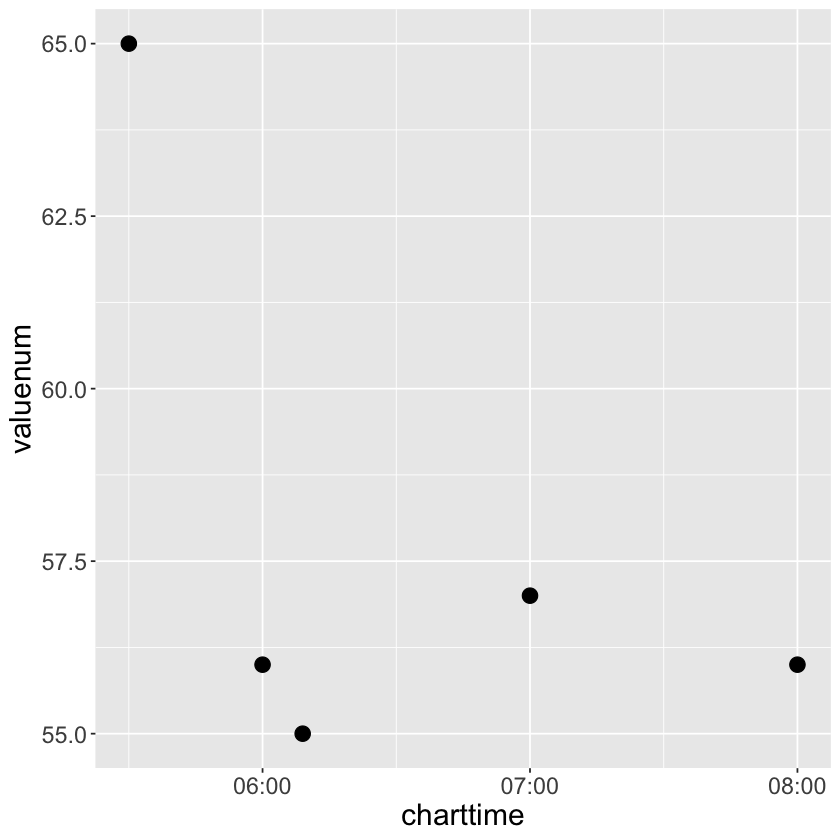

In [15]:
# heart rate readings for a specific stay
# try add colour = charttime, shape = factor(charttime) in geom_point(aes())
chartevents_tbl %>%
    filter(stay_id == 30600691, itemid == 220045) %>%
    print(width = Inf) %>%
    ggplot() + 
        geom_point(mapping = aes(x = charttime, y = valuenum), size=4)+
         theme(axis.title.x = element_text(size = 18),
               axis.text.x = element_text(size = 14),
               axis.title.y = element_text(size = 18),
               axis.text.y = element_text(size = 14)) 

## Target cohort

We aim to develop a predictive model, which computes the chance of dying within 30 days of ICU stay `intime` based on baseline features  
- `first_careunit`  
- `age` at `intime`  
- `gender`  
- `ethnicity`  
- first measurement of the following vitals since ICU stay `intime`  
    - 220045 for heart rate  
    - 223761 for Temperature Fahrenheit  

We restrict to the first ICU stays of each unique patient. 

## Wrangling and merging tibbles

Our stragegy is

1. Identify and keep the first ICU stay of each patient. 

2. Identify and keep the first vital measurements during the first ICU stay of each patient.

3. Join four tibbles into a single tibble.

Important data wrangling concepts: group_by, arrange, slice, joins, and pivot.

### Step 1: restrict to the first ICU stay of each patient

`icustays_tbl` has 76,540 rows, which is reduced to 53,150 unique ICU stays.

*See reference links for related concepts:*

https://dplyr.tidyverse.org/reference/group_by.html

https://dplyr.tidyverse.org/reference/arrange.html

https://dplyr.tidyverse.org/reference/slice.html



In [16]:
icustays_tbl_1ststay <- 
    icustays_tbl %>%
    # first ICU stay of each unique `subject_id`
    group_by(subject_id) %>%
#     slice_min(intime) %>% # this function takes LONG
#     slice_max(n = 1, order_by = desc(intime)) %>% # this faster, but still lower than below
    arrange(intime, .by_group = TRUE) %>%
    slice_head(n = 1) %>%
    ungroup() %>%
    print(width = Inf)

# A tibble: 53,150 × 8
   subject_id  hadm_id  stay_id first_careunit                                  
        <dbl>    <dbl>    <dbl> <chr>                                           
 1   10000032 29079034 39553978 Medical Intensive Care Unit (MICU)              
 2   10000980 26913865 39765666 Medical Intensive Care Unit (MICU)              
 3   10001217 24597018 37067082 Surgical Intensive Care Unit (SICU)             
 4   10001725 25563031 31205490 Medical/Surgical Intensive Care Unit (MICU/SICU)
 5   10001884 26184834 37510196 Medical Intensive Care Unit (MICU)              
 6   10002013 23581541 39060235 Cardiac Vascular Intensive Care Unit (CVICU)    
 7   10002155 23822395 33685454 Coronary Care Unit (CCU)                        
 8   10002223 22494570 39638202 Trauma SICU (TSICU)                             
 9   10002348 22725460 32610785 Neuro Intermediate                              
10   10002428 28662225 33987268 Medical Intensive Care Unit (MICU)              
   la

### Step 2: restrict to the first vital measurements during the ICU stay

Key data wrangling concepts: select, left_join, right_join, group_by, arrange, pivot

*See reference links for related concepts:*

https://dplyr.tidyverse.org/reference/select.html

https://dplyr.tidyverse.org/reference/mutate-joins.html

https://tidyr.tidyverse.org/reference/pivot_wider.html

In [17]:
# Be patient here. It takes some time (~30 seconds)
chartevents_tbl_1ststay <-
    chartevents_tbl %>%
    # pull in the intime/outtime of each ICU stay
    right_join(select(icustays_tbl_1ststay, stay_id, intime, outtime), by = c("stay_id")) %>%
    # only keep items during this ICU intime
    filter(charttime >= intime & charttime <= outtime) %>%
    # group by itemid
    group_by(stay_id, itemid) %>%
    # only keep the first chartime for each item
    # slice_min(charttime, n = 1) %>% # this function takes forever
    # top_n(-1, charttime) %>% # this function takes forever
    arrange(charttime, .by_group = TRUE) %>%
    slice_head(n = 1) %>%
    # do not need charttime and intime anymore
    select(-charttime, -intime, -outtime) %>%
    ungroup() %>%
    pivot_wider(names_from = itemid, values_from = valuenum) %>%
    # more informative column names
    rename(
        heart_rate = `220045`,
        temp_f = `223761`
    ) %>%
    print(width = Inf)

# A tibble: 53,135 × 3
    stay_id heart_rate temp_f
      <dbl>      <dbl>  <dbl>
 1 30000153        104   99.1
 2 30000646        100   98.8
 3 30001148         80   95.6
 4 30001336         65   98.5
 5 30001396         86   98.8
 6 30001446         82   98.1
 7 30001656         99   98.9
 8 30001947        105   97.9
 9 30002415         80   97.6
10 30002498         81   97.8
# … with 53,125 more rows


### Step 3: merge tibbles

New data wrangling concept: mutate.

*See the reference link here:* https://dplyr.tidyverse.org/reference/mutate.html


In [18]:
mimic_icu_cohort <- 
    icustays_tbl_1ststay %>%
    # merge tibbles
    left_join(admissions_tbl, by = c("subject_id", "hadm_id")) %>%
    left_join(patients_tbl, by = c("subject_id")) %>%
    left_join(chartevents_tbl_1ststay, by = c("stay_id")) %>%
    # age_intime is the age at ICU stay intime
    mutate(age_intime = anchor_age + lubridate::year(intime) - anchor_year) %>%
    # whether the patient died within 30 days of ICU stay intime
    mutate(hadm_to_death = ifelse(is.na(deathtime), Inf, deathtime - intime)) %>%
    mutate(thirty_day_mort = hadm_to_death <= 2592000) %>%
    print(width = Inf)

# A tibble: 53,150 × 31
   subject_id  hadm_id  stay_id first_careunit                                  
        <dbl>    <dbl>    <dbl> <chr>                                           
 1   10000032 29079034 39553978 Medical Intensive Care Unit (MICU)              
 2   10000980 26913865 39765666 Medical Intensive Care Unit (MICU)              
 3   10001217 24597018 37067082 Surgical Intensive Care Unit (SICU)             
 4   10001725 25563031 31205490 Medical/Surgical Intensive Care Unit (MICU/SICU)
 5   10001884 26184834 37510196 Medical Intensive Care Unit (MICU)              
 6   10002013 23581541 39060235 Cardiac Vascular Intensive Care Unit (CVICU)    
 7   10002155 23822395 33685454 Coronary Care Unit (CCU)                        
 8   10002223 22494570 39638202 Trauma SICU (TSICU)                             
 9   10002348 22725460 32610785 Neuro Intermediate                              
10   10002428 28662225 33987268 Medical Intensive Care Unit (MICU)              
   l

## Data visualization

It is **always** a good idea to visualize data as much as possible before any statistical analysis.

Remember we want to model: 

**thirty_day_mort ~ first_careunit + age_intime + gender + ethnicity + heart_rate + temp_f**

Let's start with a numerical summary of variables of interest.

In [19]:
mimic_icu_cohort %>%
    select(
        first_careunit, 
        gender, 
        ethnicity, 
        age_intime, 
        heart_rate, 
        temp_f
    ) %>%
    # convert strings to factor for more interpretable summaries
    mutate_if(is.character, as.factor) %>%
    summary()

                                          first_careunit  gender   
 Medical Intensive Care Unit (MICU)              :10233   F:23353  
 Cardiac Vascular Intensive Care Unit (CVICU)    : 9450   M:29797  
 Medical/Surgical Intensive Care Unit (MICU/SICU): 8833            
 Surgical Intensive Care Unit (SICU)             : 8249            
 Trauma SICU (TSICU)                             : 6965            
 Coronary Care Unit (CCU)                        : 6100            
 (Other)                                         : 3320            
                  ethnicity       age_intime       heart_rate    
 WHITE                 :35668   Min.   : 18.00   Min.   :  0.00  
 UNKNOWN               : 5827   1st Qu.: 54.00   1st Qu.: 74.00  
 BLACK/AFRICAN AMERICAN: 4874   Median : 66.00   Median : 85.00  
 OTHER                 : 2537   Mean   : 64.47   Mean   : 87.47  
 HISPANIC/LATINO       : 1827   3rd Qu.: 78.00   3rd Qu.: 99.00  
 ASIAN                 : 1564   Max.   :102.00   Max.   :941

Do you spot anything unusual?

**Consider the practical meaning when you analyze real data sets.**

### Univariate summaries

Bar plot of `first_careunit`

Set your own `theme` to make your plots look good to you.

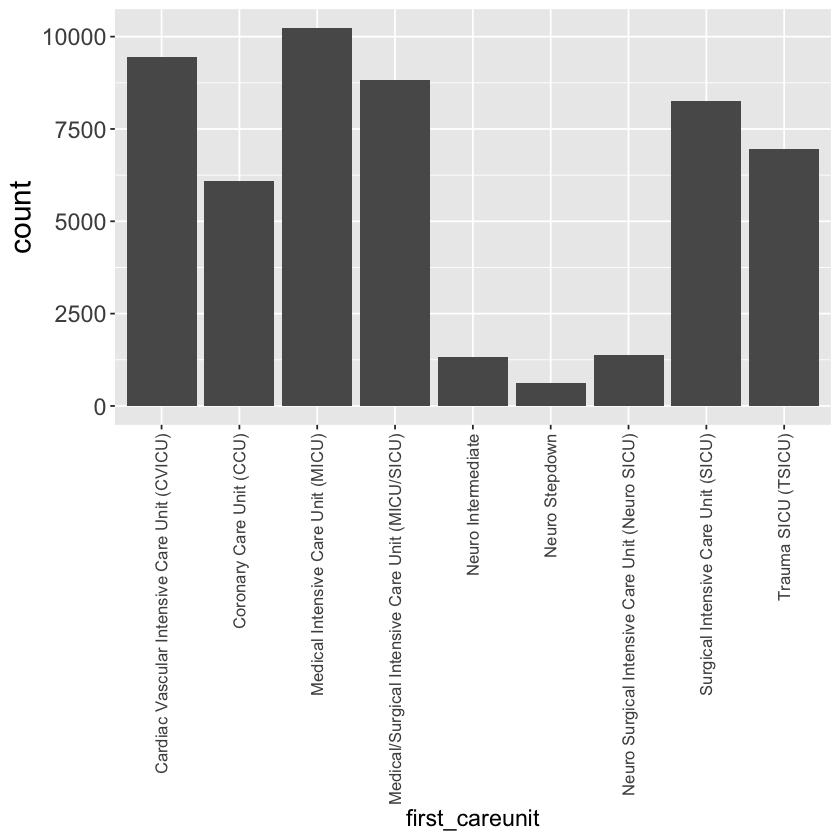

In [20]:
mimic_icu_cohort %>%
    ggplot() + 
    geom_bar(mapping = aes(x = first_careunit)) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=10), 
         axis.title.x = element_text(size = 14),
         axis.title.y = element_text(size = 18),
         axis.text.y = element_text(size = 14)) 

Histogram and boxplot of `age_at_intime`

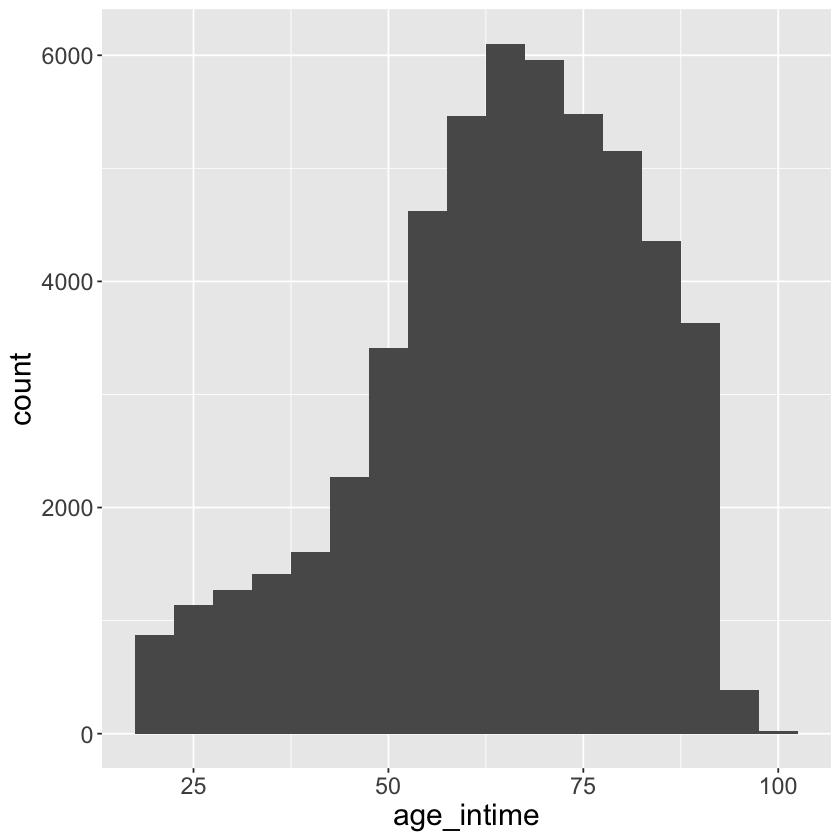

In [21]:
mimic_icu_cohort %>%
    ggplot() + 
    geom_histogram(mapping = aes(x = age_intime), binwidth = 5)+
             theme(axis.title.x = element_text(size = 18),
                   axis.text.x = element_text(size = 14),
                   axis.title.y = element_text(size = 18),
                   axis.text.y = element_text(size = 14)) 

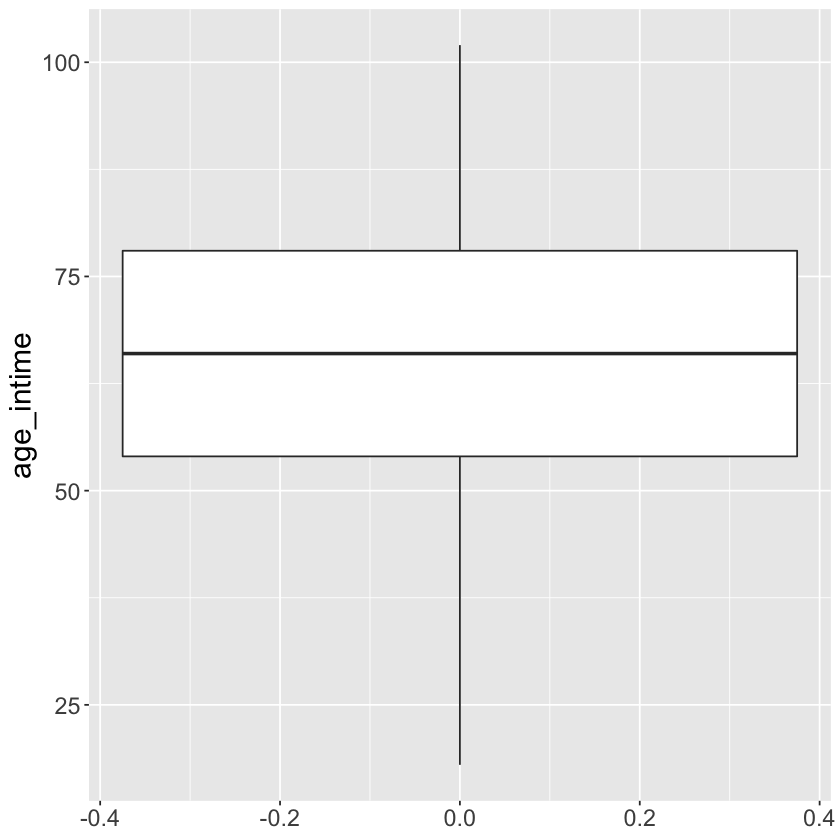

In [22]:
mimic_icu_cohort %>%
    ggplot() + 
    geom_boxplot(mapping = aes(y = age_intime))+
    theme(axis.title.x = element_text(size = 18),
                   axis.text.x = element_text(size = 14),
                   axis.title.y = element_text(size = 18),
                   axis.text.y = element_text(size = 14)) 

#### Exercises

1. Summarize discrete variables: `gender`, `ethnicity`.  
2. Summarize continuous variables: `heart_rate`, `temp_f`.
3. Is there anything unusual about `temp_f`?

### Bivariate summaries

Tally of `thirty_day_mort` vs `first_careunit`.

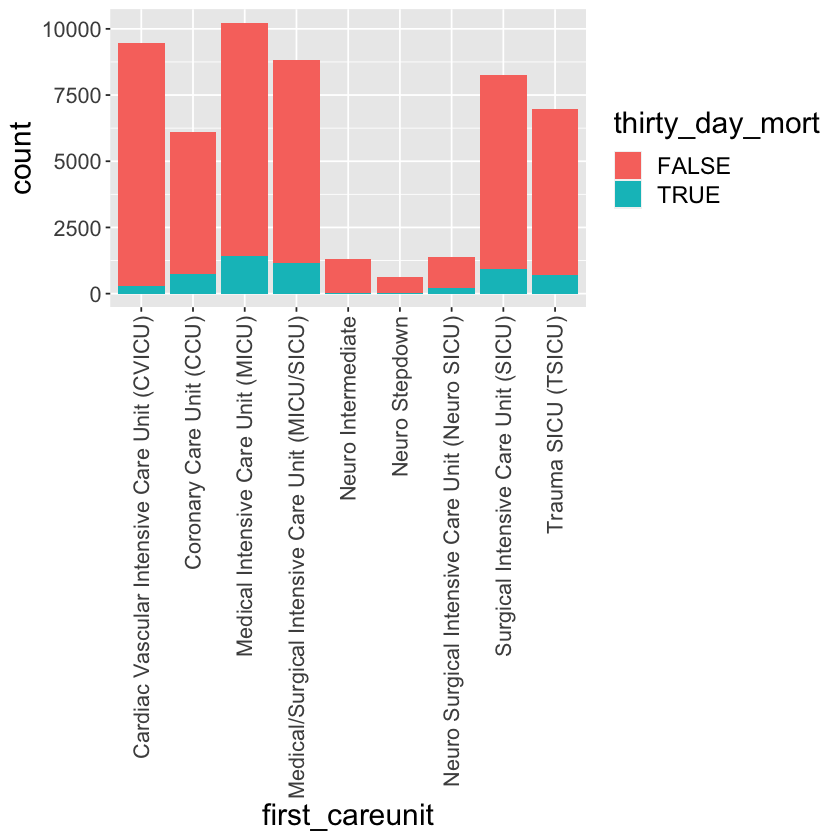

In [23]:
mimic_icu_cohort %>%
  ggplot() + 
  geom_bar(mapping = aes(x = first_careunit, fill = thirty_day_mort)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=13),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.y = element_text(size = 13),
        legend.title=element_text(size=18), 
        legend.text=element_text(size=14)) 

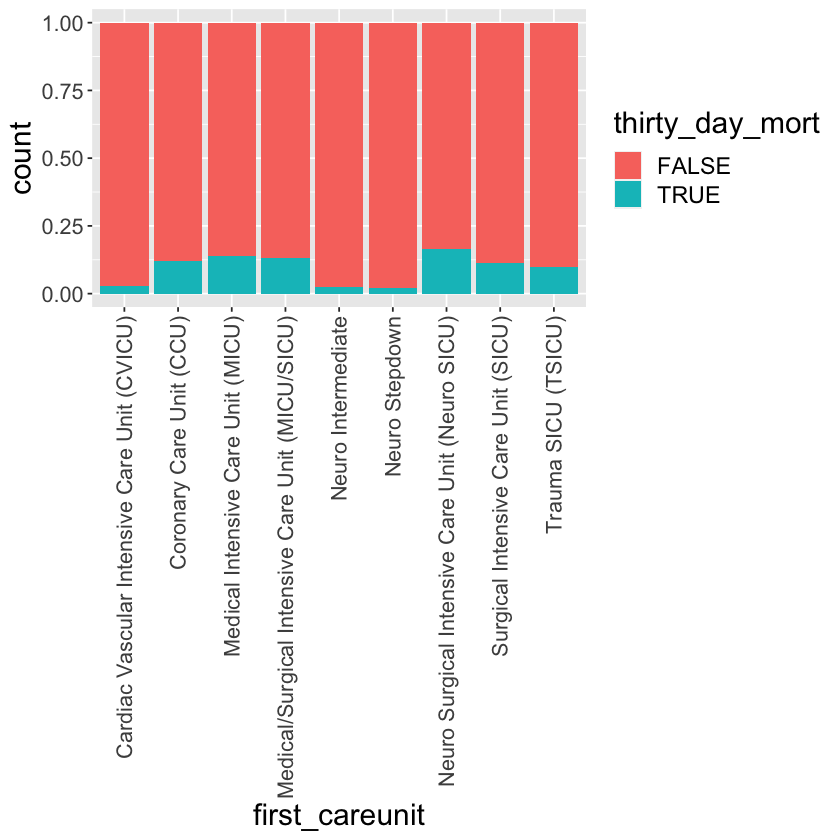

In [24]:
mimic_icu_cohort %>%
  ggplot() + 
  geom_bar(mapping = aes(x = first_careunit, fill = thirty_day_mort), position = "fill") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=13),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.y = element_text(size = 13),
        legend.title=element_text(size=18), 
        legend.text=element_text(size=14)) 

Tally of `thirty_day_mort` vs `gender`

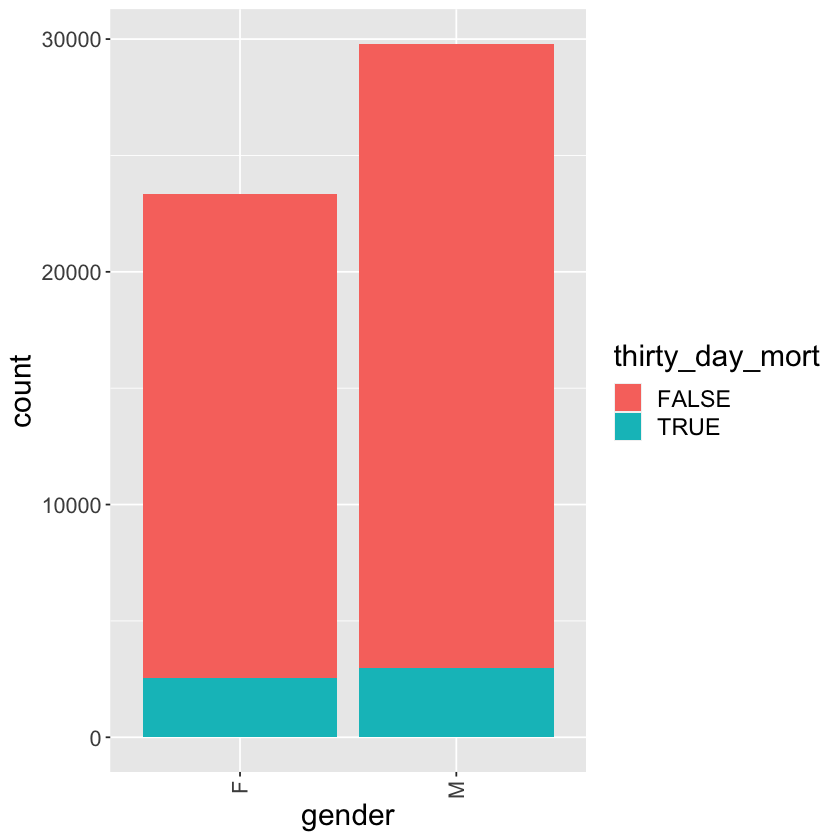

In [25]:
mimic_icu_cohort %>%
  ggplot() + 
  geom_bar(mapping = aes(x = gender, fill = thirty_day_mort)) + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=13),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.y = element_text(size = 13),
        legend.title=element_text(size=18), 
        legend.text=element_text(size=14)) 

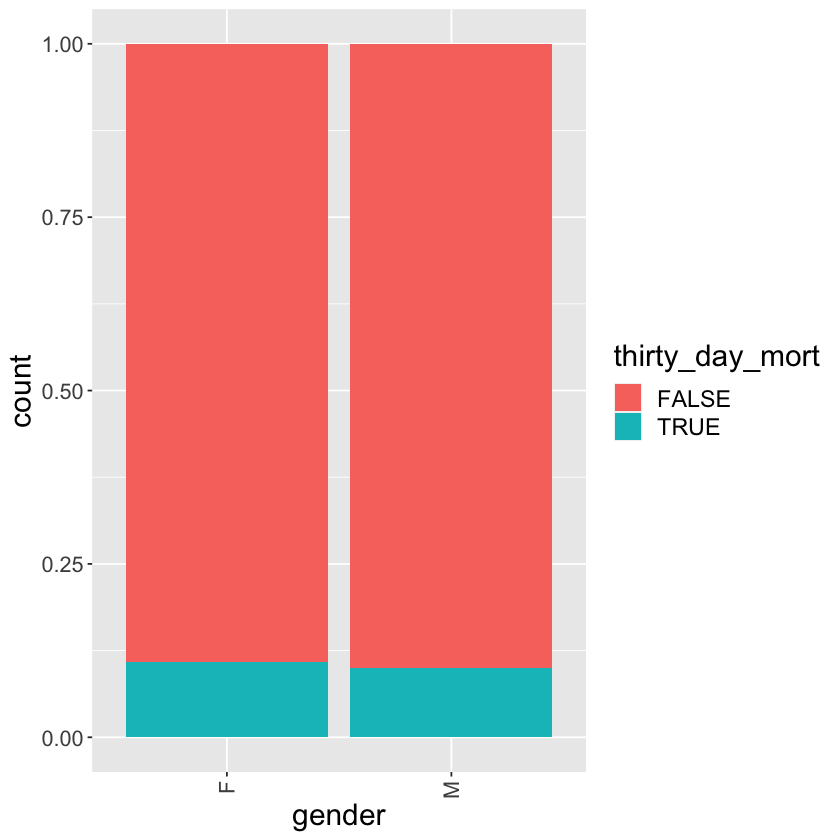

In [26]:
mimic_icu_cohort %>%
  ggplot() + 
  geom_bar(mapping = aes(x = gender, fill = thirty_day_mort), position = "fill") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=13),
       axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.y = element_text(size = 13),
        legend.title=element_text(size=18), 
        legend.text=element_text(size=14)) 

#### Exercises

1. Graphical summaries of `thirty_day_mort` vs other predictors.

## Data quality control (QC) and imputation (self study)

Necessary steps before any analytics include  
- exclude samples and variables with many missing values  
- fix data entry errors, e.g., `temp_f`  
- impute missing values  

## Data analytics (self study)

[tidymodels](https://www.tidymodels.org/) is an ecosystem for:

1. build and fit a model. 

2. beature engineering: coding qualitative predictors, transformation of predictors (e.g., log), extracting key features from raw variables (e.g., getting the day of the week out of a date variable), interaction terms, etc.

3. evaluate model using with resampling. 

4. tuning model parameters. 

## Database - revisiting `chartevents.csv.gz`

Recall that we had trouble ingesting the `chartevents.csv.gz` (2.36GB gzipped file, 329,499,788 rows) by `read_csv`. The solution is database. Set up Google BigQuery and demonstrate wrangling the `chartevents` data.

1. What is Google BigQuery? https://www.youtube.com/watch?v=d3MDxC_iuaw&ab_channel=GoogleCloudTech
2. Google BigQuery tutorial? https://www.youtube.com/watch?v=MH5M2Crn6Ag&ab_channel=MeasureSchool

## Pros and Cons of R
### Pros:
1) An open-source language: no need for a license or a fee.

2) A platform-independent language: run easily on Windows, Linux, and Mac.

3) Exemplary support for data wrangling and visiualization.

4) A language of statistics.

### Cons
1) Data handling: data stored in physical memory.

2) Slow speed.